<h1>ECOMMERCE DATA ANALYSIS</h1>

<h1>Objectives:</h1>
The objective of this data analysis project is to gain insights into the ecommerce order
data of a fictional company. We will analyze customer information, product details, and
order history to derive meaningful conclusions that can aid business decision-making.

In [1]:
#importing libraries
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#connect to mysql
connection= mysql.connector.connect(
user='root',
password='12345',
host='localhost',
database='ecommerce'
)

In [3]:
#create a connection cursor object to execute SQL statements
cursor=connection.cursor()

In [4]:
#Execute sql query
cursor.execute("select * from product")

#create dataframe for products table
product_df=pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

cursor.execute("select * from order_details")
#create dataframe for order_details table
order_df= pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

cursor.execute("select * from customer")
#create dataframe for customer table
cust_df=pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

#Using inner join to fetch all the common records between customer and order_details table
cursor.execute("select * from customer c join order_details o on c.customer_id= o.customer_id")
cust_ord_df=pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

# using left join to fetch data from order_details and customer table
cursor.execute("select*from customer c left join order_details o on c.customer_id= o.customer_id")
left_join_df=pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

#Using inner join to fetch all the common records between product and order_details table
cursor.execute("select * from product p join order_details o on p.product_id= o.product_id")
prod_ord_df=pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])



cursor.close()
connection.close()

In [5]:
#display the first 5 rows
product_df.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [6]:
#display the first 5 rows
order_df.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered


In [7]:
#display the first 5 rows
cust_df.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171
3,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830


In [8]:
#display the first 5 rows
cust_ord_df.head()

,customer_id,name,city,email,phone_no,address,pin_code,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,10,C1003,P105,1.0,450.0,COD,2023-12-19,Pending
1,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,11,C1003,P103,1.0,55000.0,COD,2023-12-21,Pending
2,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
3,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered


In [9]:
#display the first 5 rows
left_join_df.head()

,customer_id,name,city,email,phone_no,address,pin_code,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99,NaN,None,None,NaN,NaN,None,NaT,None
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001,NaN,None,None,NaN,NaN,None,NaT,None
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,10.0,C1003,P105,1.0,450.0,COD,2023-12-19,Pending
3,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,11.0,C1003,P103,1.0,55000.0,COD,2023-12-21,Pending
4,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429,3.0,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending


In [10]:
#display the first 5 rows
prod_ord_df.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,P102,Chair,furniture,Chairs,20000.0,15000.0,10,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
1,P102,Chair,furniture,Chairs,20000.0,15000.0,10,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
2,P102,Chair,furniture,Chairs,20000.0,15000.0,10,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered
3,P103,Laptop,Electronics,computer,60000.0,55000.0,50,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,P103,Laptop,Electronics,computer,60000.0,55000.0,50,11,C1003,P103,1.0,55000.0,COD,2023-12-21,Pending


<h1>Data Cleaning:</h1>

<h2>1) Data cleaning in the product_df dataframe</h2>

In [19]:
product_df.shape

(61, 7)

<h3>Inference</h3> 
The product table has 61 rows and 7 columns.

In [21]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      61 non-null     object 
 1   product_name    61 non-null     object 
 2   category        61 non-null     object 
 3   sub_category    61 non-null     object 
 4   original_price  61 non-null     float64
 5   selling_price   61 non-null     float64
 6   stock           61 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.5+ KB


<h2>Inference</h2>
The dataset, represented by the DataFrame `product_df`, contains 61 entries and 7 columns.<br> There are no missing values in any of the columns. <br>The data types include `object` for textual information, `float64` for pricing details, and `int64` for stock quantities.<br> The memory usage is relatively small at approximately 3.5 KB. 

In [23]:
product_df.describe()

,original_price,selling_price,stock
count,61.000000,61.000000,61.000000
mean,21011.491639,17774.622623,23.852459
std,19078.897228,16643.506566,13.984320
min,500.000000,450.000000,10.000000
25%,6000.000000,5000.000000,15.000000
50%,15000.000000,12000.000000,20.000000
75%,30000.000000,25000.000000,28.000000
max,80000.000000,70000.000000,100.000000


In [24]:
product_df.describe(include=object).T

,count,unique,top,freq
product_id,61,61,P102,1
product_name,61,43,Tablet,4
category,61,4,Electronics,32
sub_category,61,22,Electronics,20


<h2>Inference:</h2>

<ul>
    <li>Product ID:
All entries have unique product IDs, and the most common product ID is 'P102.'</li>
    <li>Product Name:There are 43 unique product names, with 'Tablet' being the most frequent product name, occurring 4 times.</li>
    <li>Category:There are 4 unique categories, and 'Electronics' is the most prevalent category, appearing 32 times.</li>
    <li>Sub-Category:The dataset includes 22 unique sub-categories, with 'Electronics' being the most common sub-category, occurring 20 times.</li>
</ul>

In [35]:
product_df.isnull().value_counts()

product_id  product_name  category  sub_category  original_price  selling_price  stock
False       False         False     False         False           False          False    61
Name: count, dtype: int64

<h2>Inference:</h2>
<ul>
    <li>The output of `product_df.isnull().value_counts()` indicates that there are no missing values in any of the columns of the `product_df` DataFrame.</li>
    <li>All entries are marked as `False`, meaning that every cell in the DataFrame has a valid (non-null) value.</li>
    <li>This is a positive sign for data integrity, as the dataset is complete with no missing information in any of its columns.</li>

In [11]:
product_df['category'].value_counts()

category
Electronics    32
Appliance      20
Furniture       8
furniture       1
Name: count, dtype: int64

<h2>Inference:</h2>

<ul>
    <li>The 'category' column has four unique categories: 'Electronics,' 'Appliance,' 'Furniture,' and 'furniture.'</li>
    <li>'Electronics' is the most common category, occurring 32 times.</li>
    <li>'Appliance' is the second most common category, with 20 occurrences.</li>
    <li>'Furniture' appears 8 times, while 'furniture' appears only once.</li>
</ul>

In [11]:
#replacing the 'furniture' column into the 'Furniture' column
product_df['category']= product_df['category'].replace('furniture','Furniture')

In [12]:
product_df['category'].value_counts()

category
Electronics    32
Appliance      20
Furniture       9
Name: count, dtype: int64

In [13]:
#replacing the 'computer' column into the 'Computers' column
product_df['sub_category']= product_df['sub_category'].replace('computer','Computers')

#replacing the 'chairs' column into the 'Chairs' column
product_df['sub_category']= product_df['sub_category'].replace('chairs','Chairs')

In [14]:
product_df['sub_category'].value_counts()

sub_category
Electronics      20
Computers        10
Wearables         5
Chairs            3
Entertainment     3
Audio             3
Lamps             2
Accessories       2
Tablets           2
Tables            1
Sofas             1
TVs               1
Desks             1
Printers          1
Consoles          1
Mobiles           1
phone             1
Furniture         1
Photography       1
Cameras           1
Name: count, dtype: int64

In [15]:
#replacing the 'chair' column into the 'Chair' column
product_df['product_name']= product_df['product_name'].replace('chair','Chair')

product_df['product_name'].value_counts()


product_name
Tablet                 4
Smartwatch             3
Vacuum Cleaner         3
Digital Camera         2
External Hard Drive    2
Fitness Tracker        2
Air Purifier           2
Coffee Maker           2
Gaming Console         2
Microwave Oven         2
Printer                2
Desk Lamp              2
Headphones             2
Chair                  2
Television             2
Sofa                   1
Smart Speaker          1
Smart Scale            1
Portable Speaker       1
Car Vacuum             1
Electric Toothbrush    1
Wireless Mouse         1
Gaming Mouse           1
Portable Charger       1
Wireless Earbuds       1
Bluetooth Speaker      1
Smartphone             1
Monitor                1
Blender                1
Refrigerator           1
Laptop HP              1
Dishwasher             1
Water Purifier         1
Sofa Set               1
Samsung Galaxy         1
Projector              1
Laptop                 1
Desk                   1
Microwave              1
Recliner    

<h2>2)Data cleaning in the order_df dataframe</h2>

In [42]:
order_df.shape

(76, 8)

<h3>Inference:</h3>
The order_df dataframe has 76 rows and 8 columns.

In [41]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      76 non-null     int64         
 1   customer_id   76 non-null     object        
 2   product_id    76 non-null     object        
 3   quantity      76 non-null     float64       
 4   total_price   76 non-null     float64       
 5   payment_mode  76 non-null     object        
 6   order_date    76 non-null     datetime64[ns]
 7   order_status  76 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.9+ KB


<h2>Inference:</h2>


<ul>
    <li>'order_id' is of type int64, 'customer_id,' 'product_id,' 'payment_mode,' and 'order_status' are of type object, 'quantity' and 'total_price' are of type float64, and 'order_date' is of type datetime64[ns]:</li
<li>'quantity' and 'total_price' provide quantitative details about order quantities and total prices.</li>
    <li>The 'order_date' column is of datetime type, indicating it contains temporal information about order placement.</li>
    <li>There are no missing values in any column, ensuring data completeness and reliability.</li>>
<ull>



In [43]:
order_df.describe()

,order_id,quantity,total_price,order_date
count,76.000000,76.000000,76.000000,76
mean,51.144737,1.355263,20873.684211,2024-02-02 03:28:25.263158016
min,3.000000,1.000000,450.000000,2023-11-23 00:00:00
25%,22.750000,1.000000,6500.000000,2024-01-02 18:00:00
50%,57.500000,1.000000,16500.000000,2024-02-12 12:00:00
75%,76.250000,2.000000,30000.000000,2024-03-02 06:00:00
max,95.000000,3.000000,90000.000000,2024-03-21 00:00:00
std,28.673660,0.558664,18442.574791,NaN


In [44]:
order_df.isnull().sum()

order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

<h2>Inference:</h2>
We can see here that there are no null values in any of the columns.

In [45]:
#check for duplicates
order_df.duplicated().sum()

0

<h2>Inference:</h2>
No duplicate values are present in the dataframe.

In [16]:
#replacing the 'delivered' column into the 'Delivered' column
order_df['order_status']= order_df['order_status'].replace('delivered','Delivered')

order_df['order_status'].value_counts()


order_status
Delivered    28
Pending      25
Shipped      16
Cancelled     6
Returned      1
Name: count, dtype: int64

<h2>3)Data cleaning in cust_df dataframe</h2>

In [46]:
cust_df.shape

(62, 7)

<h2>Inference:</h2>
The cust_df dataframe has 62 rows and 7 columns.

In [47]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  62 non-null     object
 1   name         62 non-null     object
 2   city         62 non-null     object
 3   email        62 non-null     object
 4   phone_no     62 non-null     object
 5   address      62 non-null     object
 6   pin_code     62 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.5+ KB


<h2>Inference:</h2>
customer_id , name, city , email , phone_no, address are of type object.<br>
pin_code are type of int64.

In [48]:
cust_df.describe()

,pin_code
count,62.000000
mean,38989.225806
std,29968.018681
min,99.000000
25%,9408.000000
50%,34567.000000
75%,56789.000000
max,98766.000000


In [49]:
cust_df.isnull().sum()

customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

<h2>Inference:</h2>
We can see here that there are no null values in any of the columns.

<h2>4)Data Cleaning of cust_ord_df dataframe</h2>

In [20]:
cust_ord_df.shape

(76, 15)

<h2>Inference:</h2>
The dataframe contains 76 rows and 15 columns.

In [21]:
cust_ord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   76 non-null     object        
 1   name          76 non-null     object        
 2   city          76 non-null     object        
 3   email         76 non-null     object        
 4   phone_no      76 non-null     object        
 5   address       76 non-null     object        
 6   pin_code      76 non-null     int64         
 7   order_id      76 non-null     int64         
 8   customer_id   76 non-null     object        
 9   product_id    76 non-null     object        
 10  quantity      76 non-null     float64       
 11  total_price   76 non-null     float64       
 12  payment_mode  76 non-null     object        
 13  order_date    76 non-null     datetime64[ns]
 14  order_status  76 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(2)

<h2>Infernce:</h2>

<ul>
    <li>Size and Structure:</li>
    <li>DataFrame: 76 rows, 15 columns.</li>
    <li>Data types: Object (10), int64 (2), float64 (2), datetime64[ns] (1).</li>
    <li>Customer Information:</li>
    <li>Customer-related columns contain unique identifiers (customer_id), personal details (name, city, email, phone_no), and location information (address, pin_code).</li>
    <li>Order Information:</li>
    <li>Order-related columns include order details (order_id, product_id, quantity, total_price, payment_mode, order_date, order_status).
order_date is in datetime format.</li
    <li>Data Completeness:</li>
    <li>No missing values observed across all columns.</li>
    <li>Data Types:</li>
    <li>Numeric columns (quantity, total_price) are of type float64, suitable for calculations.</li>
    <li>
pin_code and order_id are of type int64.</li
</ul>>>

>


In [22]:
cust_ord_df.describe()

,pin_code,order_id,quantity,total_price,order_date
count,76.000000,76.000000,76.000000,76.000000,76
mean,38021.565789,51.144737,1.355263,20873.684211,2024-02-02 03:28:25.263158016
min,171.000000,3.000000,1.000000,450.000000,2023-11-23 00:00:00
25%,12345.000000,22.750000,1.000000,6500.000000,2024-01-02 18:00:00
50%,32830.000000,57.500000,1.000000,16500.000000,2024-02-12 12:00:00
75%,56789.000000,76.250000,2.000000,30000.000000,2024-03-02 06:00:00
max,98766.000000,95.000000,3.000000,90000.000000,2024-03-21 00:00:00
std,29172.462709,28.673660,0.558664,18442.574791,NaN


<h2>Inference:</h2>
<ul>
    <li>The dataset includes 76 entries.</li>
    <li>
For quantity, most orders involve 1 or 2 items, with a mean of approximately 1.36</li>
    <li>
Total prices vary widely, with a mean of approximately 20873.68 and a standard deviation of 18442.5</li>
    <li>.
Orders span a period from 2023-11-23 to 2024-03-21.</li>
</ul>

In [23]:
cust_ord_df.isnull().sum()

customer_id     0
name            0
city            0
email           0
phone_no        0
address         0
pin_code        0
order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

<h2>Inference:</h2>
There are no null values in any of the columns.

In [16]:
duplicate_rows = cust_ord_df.duplicated()

# Display rows with duplicate values
print(cust_ord_df[duplicate_rows])

Empty DataFrame
Columns: [customer_id, name, city, email, phone_no, address, pin_code, order_id, customer_id, product_id, quantity, total_price, payment_mode, order_date, order_status]
Index: []


In [17]:
column_to_check = 'customer_id'  

# Check for duplicate values in the specified column
duplicate_values = cust_ord_df[cust_ord_df.duplicated(subset=[column_to_check], keep=False)]

# Display rows with duplicate values in the specified column
print(duplicate_values)


   customer_id       name              city                  email  \
0        C1003      Peter          Kanagawa  peter.parker@mail.com   
1        C1003      Peter          Kanagawa  peter.parker@mail.com   
3        C1005       Jack  Lake Buena Vista         Jack@gmail.com   
4        C1005       Jack  Lake Buena Vista         Jack@gmail.com   
5        C1005       Jack  Lake Buena Vista         Jack@gmail.com   
6        C1006      Wyatt          Kanagawa      Wyatt@example.com   
7        C1006      Wyatt          Kanagawa      Wyatt@example.com   
8        C1008     Sophia             Tokyo       sophia@gmail.com   
9        C1008     Sophia             Tokyo       sophia@gmail.com   
10       C1009     Oliver            Sydney       oliver@gmail.com   
11       C1009     Oliver            Sydney       oliver@gmail.com   
12       C1009     Oliver            Sydney       oliver@gmail.com   
13       C1010       Emma          Kanagawa       emma@example.com   
14       C1010      

<h2>Inference:</h2>
<ul>
    <li>Customers with IDs 'C1003', 'C1005', 'C1006', 'C1008', 'C1009', 'C1010', 'C1011', 'C1013', 'C1014', 'C1015', 'C1016', 'C1017', and 'C1019' are each associated with more than one entry in the DataFrame.</li>
    <li>These customers have repeatedly placed their orders.</li>
</ul>

<h2>5)Data cleaning of left_join_df dataframe</h2>

In [24]:
left_join_df.shape

(79, 15)

<h2>Inference:</h2>
The dataframe contains 79 rows and 15 columns.

In [56]:
left_join_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   79 non-null     object        
 1   name          79 non-null     object        
 2   city          79 non-null     object        
 3   email         79 non-null     object        
 4   phone_no      79 non-null     object        
 5   address       79 non-null     object        
 6   pin_code      79 non-null     int64         
 7   order_id      76 non-null     float64       
 8   customer_id   76 non-null     object        
 9   product_id    76 non-null     object        
 10  quantity      76 non-null     float64       
 11  total_price   76 non-null     float64       
 12  payment_mode  76 non-null     object        
 13  order_date    76 non-null     datetime64[ns]
 14  order_status  76 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(1)

<h2>Inference:</h2>

The provided DataFrame has 79 entries and 15 columns. <br>
Key observations:<br>

1. **Customer Information:**<br>
   - `customer_id`, `name`, `city`, `email`, `phone_no`, `address`, `pin_code`

2. **Order Information:**<br>
   - `order_id`, `product_id`, `quantity`, `total_price`, `payment_mode`, `order_date`, `order_status`

3. **Data Completeness:**<br>
   - Some entries have missing values in the 'order' related columns (order_id, customer_id, product_id, quantity, total_price, payment_mode, order_date, order_status).

4. **Data Types:**<br>
   - `order_date` is in datetime format.<br>
   - `phone_no` is stored as an object (string) instead of a numeric format.<br>

5. **Memory Usage:**<br>
   - The DataFrame consumes 9.4 KB of memory.

In [57]:
left_join_df.isnull().sum()

customer_id     0
name            0
city            0
email           0
phone_no        0
address         0
pin_code        0
order_id        3
customer_id     3
product_id      3
quantity        3
total_price     3
payment_mode    3
order_date      3
order_status    3
dtype: int64

<h2>Inference:</h2>
There are three missing values in each of the following columns: 'order_id', 'customer_id', 'product_id', 'quantity', 'total_price', 'payment_mode', 'order_date', and 'order_status'.<br>
From here we can understand that 3 customers from the dataframe have not purchased anything.

In [18]:
# To find the 3 customers who have not purchased anything
customers_with_null_order_id = left_join_df[left_join_df['order_id'].isnull()]

# Display the customers with null values in 'order_id'
print(customers_with_null_order_id[['customer_id', 'name', 'city', 'email']])


   customer_id customer_id   name    city            email
0        C1001        None  Steve   Tokyo  steve@gmail.com
1        C1002        None   john  Sydney   john@gmail.com
10       C1007        None  lilly   Tokyo  lilly@gmail.com


<h2>Inference:</h2>
<ul>
    <li>The customers with customer_id 'C1001', 'C1002', 'C1007' have not purchased anything as we have their order_id as 'None'.</li>
</ul>

<h2>Data cleaning in the prod_ord_df</h2>

In [17]:
#replacing the 'furniture' column into the 'Furniture' column
prod_ord_df['category']= prod_ord_df['category'].replace('furniture','Furniture')

In [21]:
prod_ord_df['sub_category'].value_counts()

sub_category
Electronics      27
Computers         9
Wearables         5
Chairs            4
Entertainment     3
Audio             3
Tablets           3
chairs            2
Tables            2
Sofas             2
Cameras           2
computer          2
Lamps             2
TVs               2
Desks             2
Accessories       2
Printers          1
Consoles          1
Furniture         1
Photography       1
Name: count, dtype: int64

<h1>Data Visualization:</h1>

<h2>Customer Analysis:</h2>

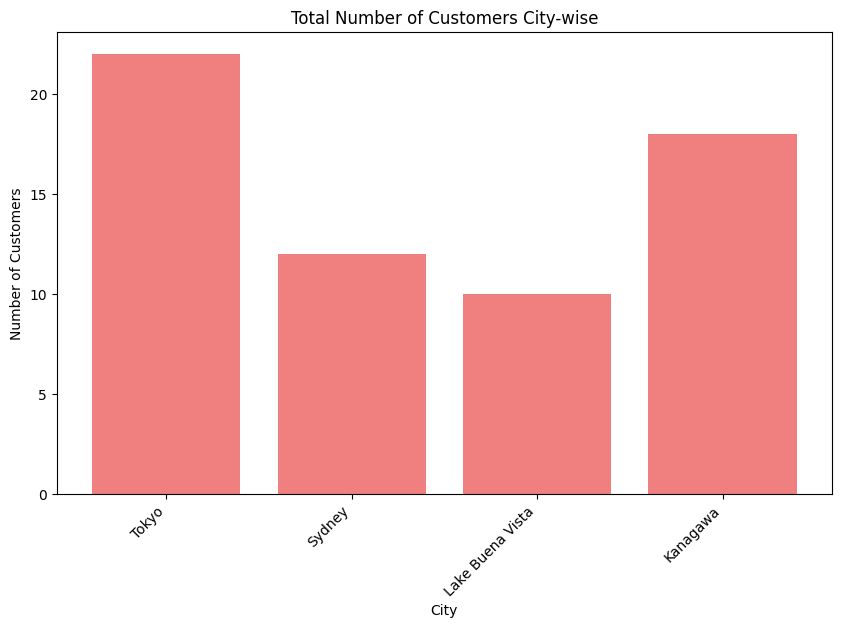

In [38]:
#Total number of customers city-wise
customer_count_citywise = cust_df.groupby('city')['customer_id'].nunique().reset_index().sort_values(by='city',ascending=False)


# Create a bar plot using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(customer_count_citywise['city'], customer_count_citywise['customer_id'], color='lightcoral')
plt.title('Total Number of Customers City-wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


<h2>Inference:</h2>
<ul>
    <li>Tokyo has the most number of customers with a number of 20 customers and above. </li>
    <li>Kanagawa is the second city having customers ranging between 15-20 . </li>
    <li>Lake Buena Vista has the least number of customers ranging from 0-10.</li>
</ul>

C:\Users\anuskaa2003\AppData\Local\Temp\ipykernel_9576\3372836896.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_id', y='order_frequency', data=top_customers, palette='viridis')


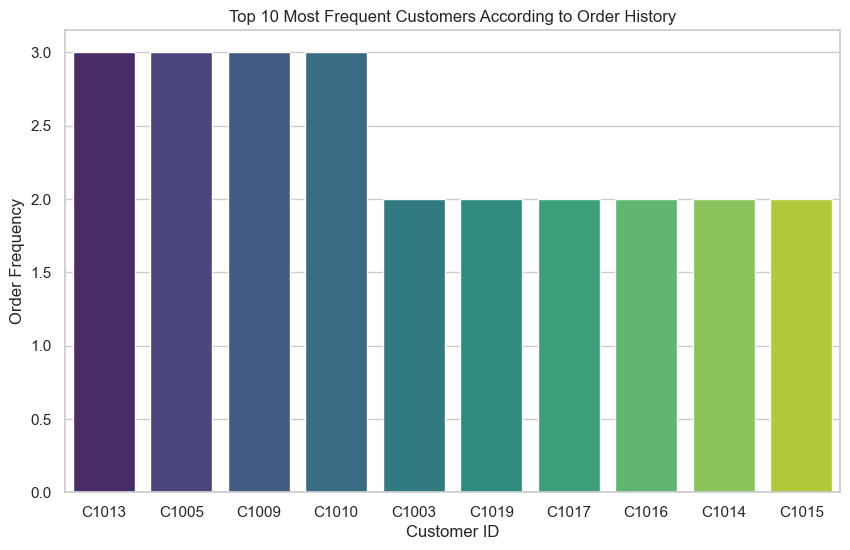

In [108]:
# Identifying the most frequent customers based on their order history

customer_order_frequency = order_df.groupby('customer_id')['order_id'].nunique().reset_index()
customer_order_frequency.columns = ['customer_id', 'order_frequency']
top_customers = customer_order_frequency.sort_values(by='order_frequency', ascending=False).head(10)

# Set the style for the plot 
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_id', y='order_frequency', data=top_customers, palette='viridis')
plt.title('Top 10 Most Frequent Customers According to Order History')
plt.xlabel('Customer ID')
plt.ylabel('Order Frequency')
plt.show()


<h2>Inference:</h2>
<ul>
    <li>Customer IDs 'C1013', 'C1005', 'C1009', 'C1010' are the most frequent customers according to their order history.</li>
    <li>Customer IDs 'C1003', 'C1019', 'C1017', 'C1016', 'C1014', 'C1015' have their order frequency ranging from 0.0- 2.0 .</li>
</ul>

C:\Users\anuskaa2003\AppData\Local\Temp\ipykernel_9576\613110375.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pin_code', data=cust_df, palette='muted', order=cust_df['pin_code'].value_counts().index)


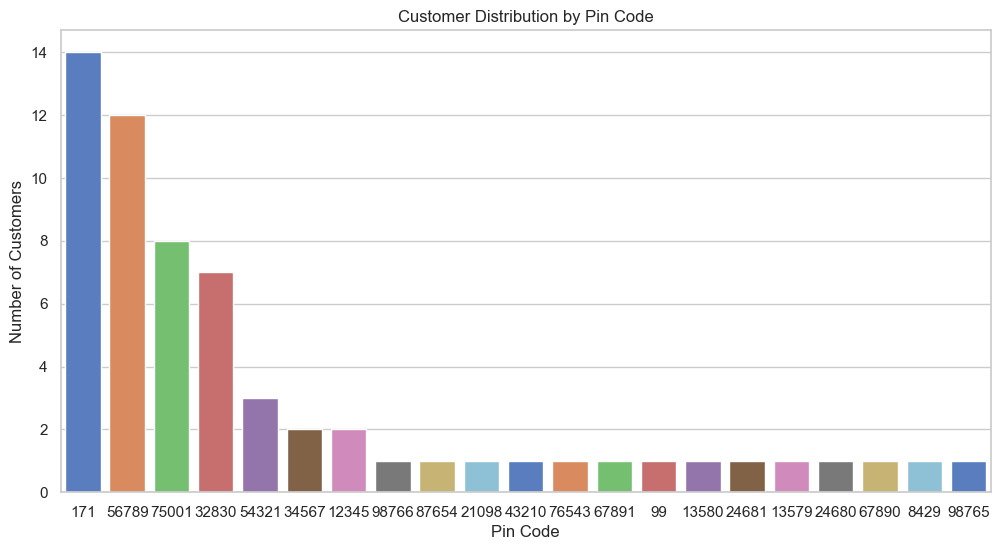

In [10]:
#Customer distribution by Pin Code
# Set the style for the plot
sns.set(style="whitegrid")

# Bar plot for customer distribution by pin code
plt.figure(figsize=(12, 6))
sns.countplot(x='pin_code', data=cust_df, palette='muted', order=cust_df['pin_code'].value_counts().index)
plt.title('Customer Distribution by Pin Code')
plt.xlabel('Pin Code')
plt.ylabel('Number of Customers')
plt.show()


<h2>Inference:</h2>
<ul>
    <li>The pincode 171 has the maximum number of customers.</li>
    <li>The pincode from 98766 to 98765 have the least number of customers. </li>
</ul>

<h1>Product Analysis</h1>

category
Electronics    32
Appliance      20
Furniture       9
Name: count, dtype: int64


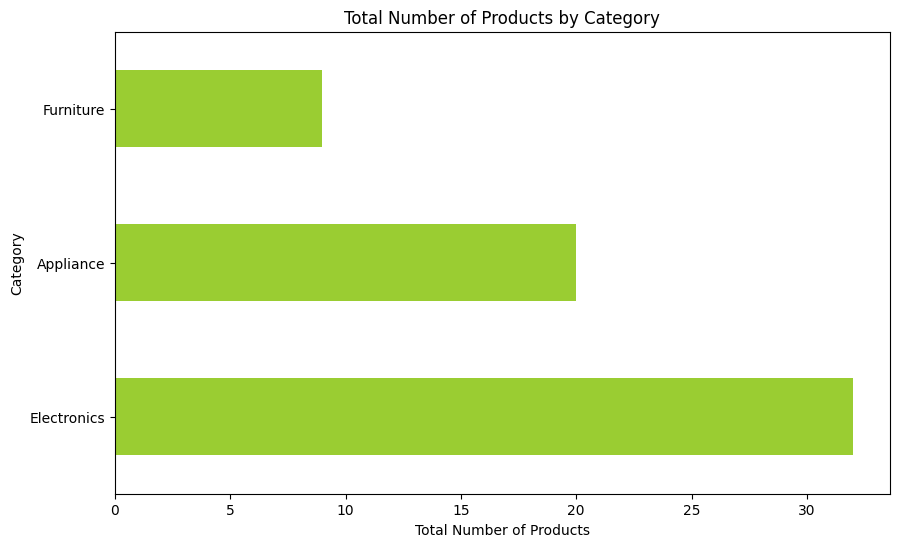

In [39]:
# Calculate the total number of products by category
products_by_category = product_df['category'].value_counts()
print(products_by_category)

# Set up the Matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot for the total number of products by category
products_by_category.plot(kind='barh', color='yellowgreen')

# Adding labels and title
plt.title('Total Number of Products by Category')
plt.xlabel('Total Number of Products')
plt.ylabel('Category')



# Display the plot
plt.show()


<h2>Inference:</h2>
<ul>
    <li>The category 'Electronics' has the maximum number of products, i.e, 32.</li>
    <li>The category 'Appliance" have 20 products .</li>
    <li>The category 'Furniture' has the least number of products, i.e. 9.</li>
</ul>

sub_category
Electronics      20
Computers        10
Wearables         5
Chairs            3
Entertainment     3
Audio             3
Lamps             2
Accessories       2
Tablets           2
Tables            1
Sofas             1
TVs               1
Desks             1
Printers          1
Consoles          1
Mobiles           1
phone             1
Furniture         1
Photography       1
Cameras           1
Name: count, dtype: int64


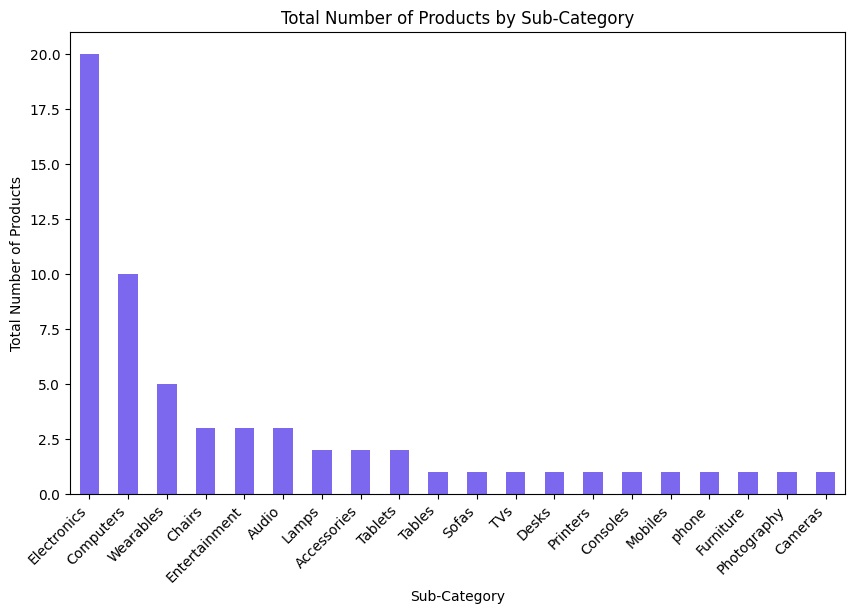

In [40]:
# Calculate the total number of products by sub-category
products_by_category = product_df['sub_category'].value_counts()
print(products_by_category)

# Set up the Matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot for the total number of products by category
products_by_category.plot(kind='bar', color='mediumslateblue')

# Adding labels and title
plt.title('Total Number of Products by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Number of Products')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


<h2>Inference:</h2>
<ul>
    <li>The sub-category 'Electronics' has the maximum number of products.</li>
    <li>The sub-categories 'TVs', 'chairs', 'Tables', 'Cameras', 'Desks', 'Printers', 'Console', 'Mobiles', 'phone', 'Furniture', 'Photography' and 'Sofas' have the least number of products.</li>
</ul>

   product_id         product_name     category sub_category  original_price  \
0        P102                Chair    Furniture       Chairs         20000.0   
3        P105              Blender    Appliance  Electronics           500.0   
46       P148               Tablet  Electronics    Computers         30000.0   
10       P112                Chair    Furniture       Chairs          1000.0   
39       P141              Printer  Electronics    Computers         12000.0   
30       P132             Sofa Set    Furniture    Furniture         50000.0   
12       P114         Refrigerator    Appliance  Electronics         20000.0   
33       P135           Dishwasher    Appliance  Electronics         18000.0   
42       P144  External Hard Drive  Electronics    Computers          5000.0   

    selling_price  stock  
0         15000.0     10  
3           450.0     10  
46        25000.0     10  
10          800.0     10  
39        10000.0     10  
30        45000.0     10  
12        

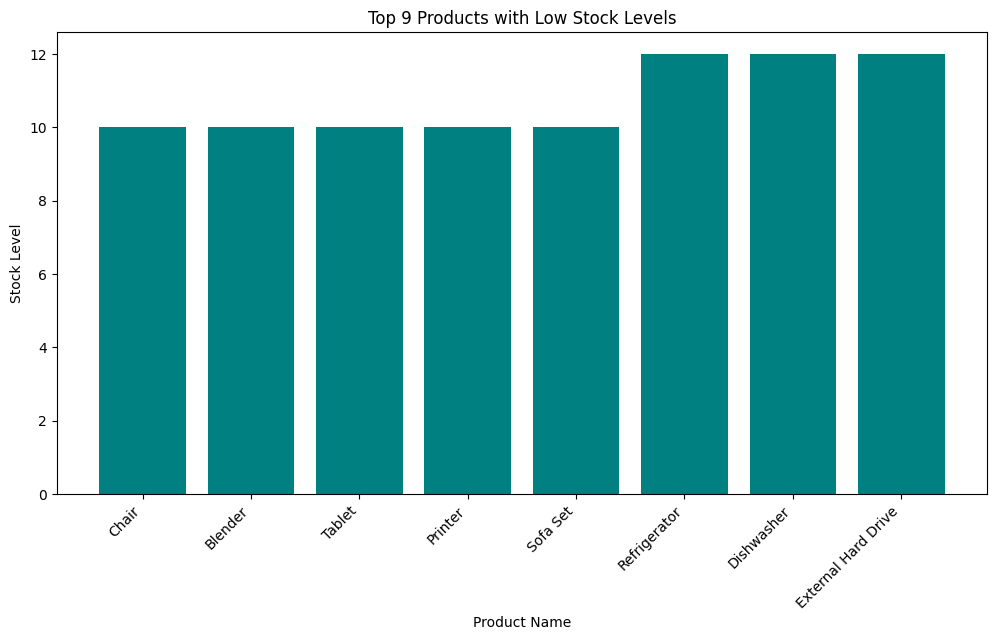

In [42]:
# Set a threshold for low stock 
low_stock_threshold = 20

# Filter products with low stock
low_stock_products = product_df[product_df['stock'] < low_stock_threshold]

# Sort products by stock level in ascending order
low_stock_products = low_stock_products.sort_values(by='stock', ascending=True)

# Take the top 9 products
top_low_stock_products = low_stock_products.head(9)
print(top_low_stock_products)

# Set up the Matplotlib figure
plt.figure(figsize=(12, 6))

# Create a bar plot for the top 9 products with low stock levels
plt.bar(top_low_stock_products['product_name'], top_low_stock_products['stock'], color='teal')

# Adding labels and title
plt.title('Top 9 Products with Low Stock Levels')
plt.xlabel('Product Name')
plt.ylabel('Stock Level')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


<h2>Inference:</h2>
<ul>
    <li>These are the items which have their stock levels less than 20.</li>
    <li>'Refrigerator', 'Dishwasher', 'External Hard Drive', have their stocks at 12.</li>
</ul>

Average Price 17774.62262295082
Maximum Price 70000.0
Minimum Price 450.0


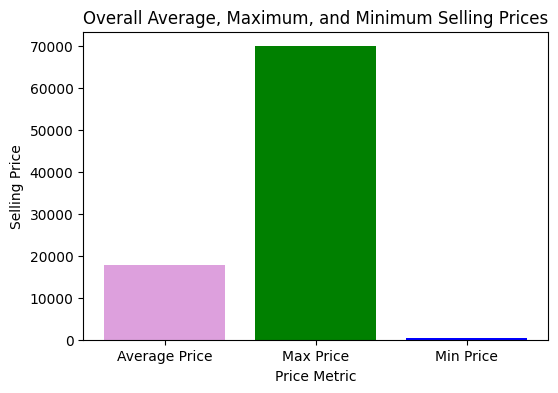

In [13]:
# Calculate overall average, maximum, and minimum selling prices
overall_average_price = product_df['selling_price'].mean()
overall_max_price = product_df['selling_price'].max()
overall_min_price = product_df['selling_price'].min()

print("Average Price",overall_average_price)
print("Maximum Price",overall_max_price)
print("Minimum Price",overall_min_price)
# Visualize the results using a bar chart
plt.figure(figsize=(6, 4))

plt.bar(['Average Price', 'Max Price', 'Min Price'], [overall_average_price, overall_max_price, overall_min_price], color=['plum', 'green', 'blue'])
plt.xlabel('Price Metric')
plt.ylabel('Selling Price')
plt.title('Overall Average, Maximum, and Minimum Selling Prices')
plt.show()


<h2>Inference:</h2>
<ul>
    <li>The average of selling prices is Rs17774.62262295082.</li>
    <li>Maximum price range is Rs70000.</li>
    <li>Minimum Price range is Rs 450.</li>
</ul>

C:\Users\anuskaa2003\AppData\Local\Temp\ipykernel_9128\552159674.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quantity', y='product_name', data=top_selling_products, palette='viridis')


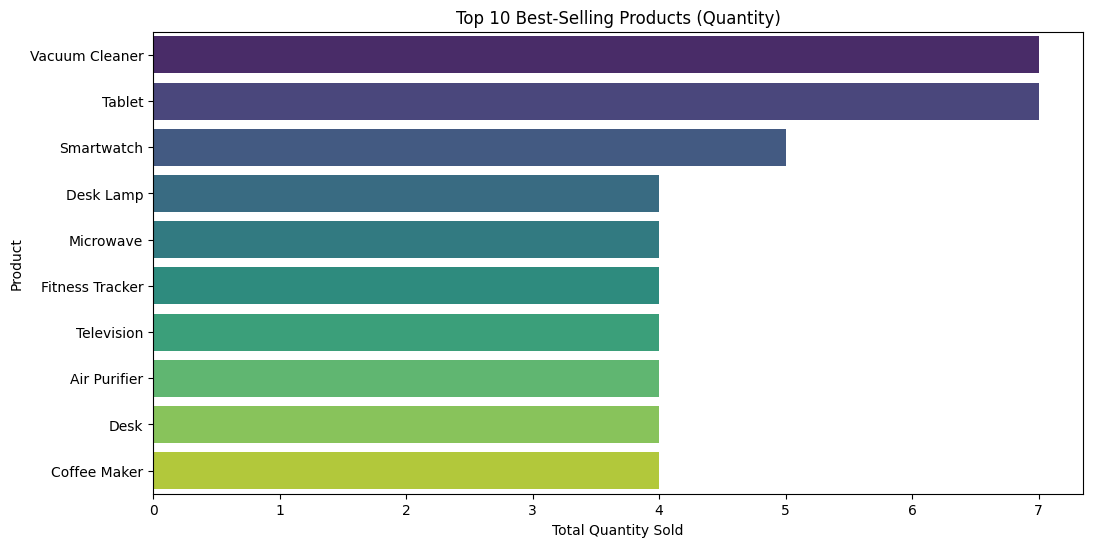

In [68]:
# Calculate the total quantity sold per product
product_quantity = prod_ord_df.groupby('product_name')['quantity'].sum().reset_index()

# Sort products by total quantity sold in descending order
top_selling_products = product_quantity.sort_values(by='quantity', ascending=False).head(10)

# Visualize the top 10 best-selling products based on quantity using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='quantity', y='product_name', data=top_selling_products, palette='viridis')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.title('Top 10 Best-Selling Products (Quantity)')
plt.show()


<h2>Inference:</h2>
<ul>
    <li>Vaccum cleaner and Tablet are the most selling products with having quantity 4.0 .</li>
</ul>

<h1>Order Analysis</h1>

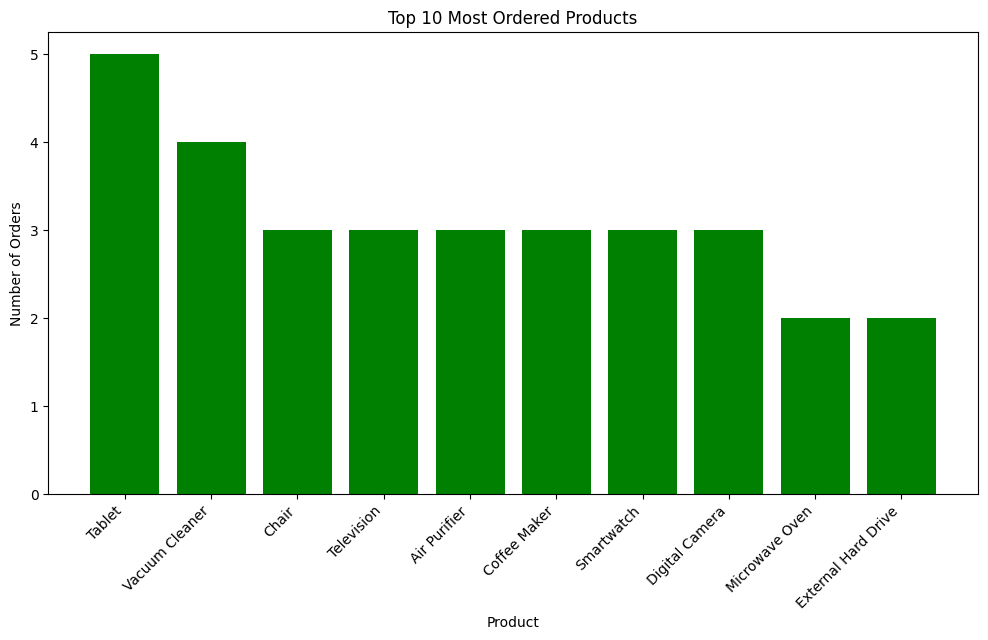

In [67]:
# Calculate the number of times each product is ordered
product_order_counts = prod_ord_df['product_name'].value_counts().reset_index()
product_order_counts.columns = ['product_name', 'order_count']

# Sort products by order count in descending order
top_products = product_order_counts.head(10)

# Visualize the top 10 most ordered products
plt.figure(figsize=(12, 6))
plt.bar(top_products['product_name'], top_products['order_count'], color='green')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Ordered Products')

plt.xticks(rotation=45, ha='right')
plt.show()


<h2>Inference:</h2>
<ul>
    <li>Tablet is the most ordered product.</li>
    <li>Microwave and External Hard Drive are the least ordered products.</li>
    
</ul>

C:\Users\anuskaa2003\AppData\Local\Temp\ipykernel_9576\1666402226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_status', data=order_df, palette='Set2')


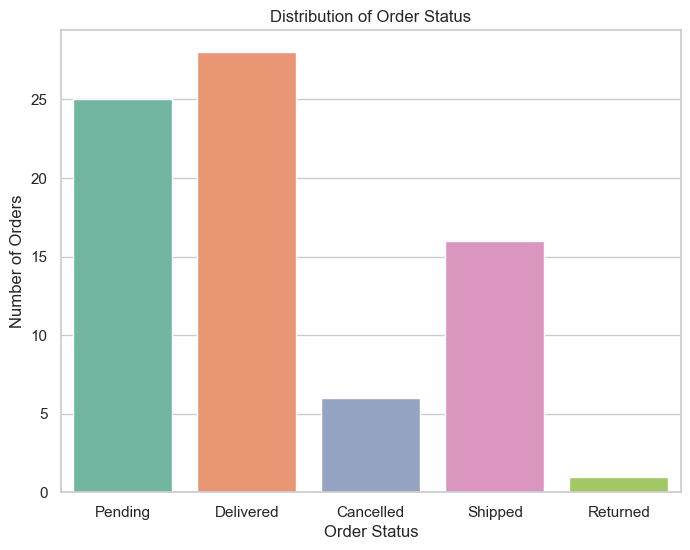

In [98]:
# Visualize the distribution of order statuses
plt.figure(figsize=(8, 6))
sns.countplot(x='order_status', data=order_df, palette='Set2')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Status')
plt.show()


<h2>Inference</h2>
<ul>
    <li>Most of the orders have been delivered.</li>
    <li>25 orders are in pending state.</li>
    <li>Orders within the range of 15-20 have been shipped.</li>
    <li>Orders within the range 5-10 have been cancelled.</li>
    <li>Returned Orders are the least in the plot.</li>
</ul>

   customer_id  order_id
2        C1005         3
5        C1009         3
6        C1010         3
9        C1013         3
0        C1003         2
3        C1006         2
4        C1008         2
7        C1011         2
10       C1014         2
11       C1015         2


C:\Users\anuskaa2003\AppData\Local\Temp\ipykernel_6228\3472863057.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_id', y='order_id', data=top_10_customers_orders, palette='cubehelix')


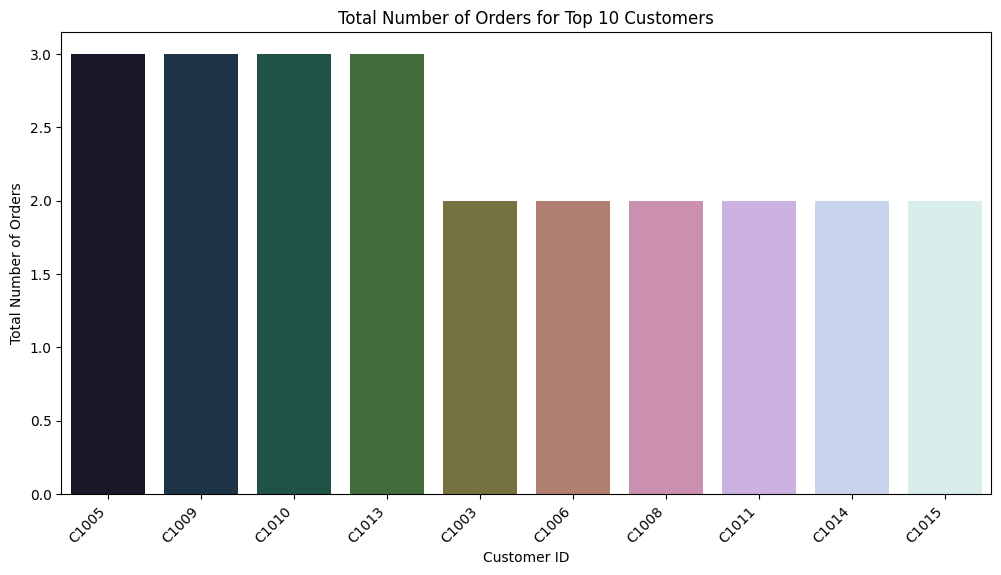

In [43]:
# Calculate the total number of orders per customer
orders_per_customer = order_df.groupby('customer_id')['order_id'].count().reset_index()

# Select the top 10 customers
top_10_customers_orders = orders_per_customer.nlargest(10, 'order_id')
print(top_10_customers_orders)

# Visualize the total number of orders for the top 10 customers using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_id', y='order_id', data=top_10_customers_orders, palette='cubehelix')
plt.xlabel('Customer ID')
plt.ylabel('Total Number of Orders')
plt.title('Total Number of Orders for Top 10 Customers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


<h2>Inference:</h2>
<ul>
    <li>The customers with IDs 'C1005', 'C1009', 'C1010', 'C1013' have made the most orders.</li>
    
    
</ul>

   customer_id  total_price
5        C1009     115000.0
9        C1013      94000.0
6        C1010      90000.0
24       C1033      90000.0
15       C1019      75000.0
3        C1006      70000.0
10       C1014      70000.0
22       C1031      70000.0
4        C1008      56500.0
0        C1003      55450.0


C:\Users\anuskaa2003\AppData\Local\Temp\ipykernel_6228\966501230.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_id', y='total_price', data=top_10_customers_spending, palette='magma')


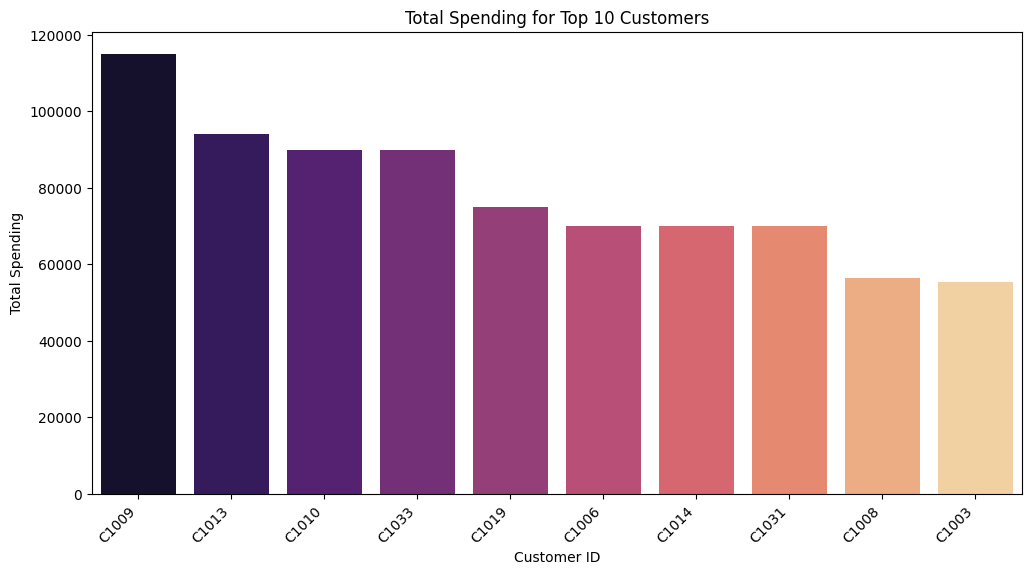

In [44]:
# Calculate the total spending per customer
spending_per_customer = order_df.groupby('customer_id')['total_price'].sum().reset_index()

# Select the top 10 customers
top_10_customers_spending = spending_per_customer.nlargest(10, 'total_price')
print(top_10_customers_spending)

# Visualize the total spending for the top 10 customers using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_id', y='total_price', data=top_10_customers_spending, palette='magma')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.title('Total Spending for Top 10 Customers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


<h2>Inference:</h2>
<ul>
    <li>The customer with ID 'C1009' has spent most on orders with a range between Rs10000 - Rs12000.</li>
    <li>The customer with ID 'C1003' has spent the least with  a range between Rs4000-Rs6000. </li>
</ul>

       product_name  quantity
35   Vacuum Cleaner       7.0
33           Tablet       7.0
29       Smartwatch       5.0
7         Desk Lamp       4.0
18        Microwave       4.0
13  Fitness Tracker       4.0
34       Television       4.0
0      Air Purifier       4.0
6              Desk       4.0
5      Coffee Maker       4.0


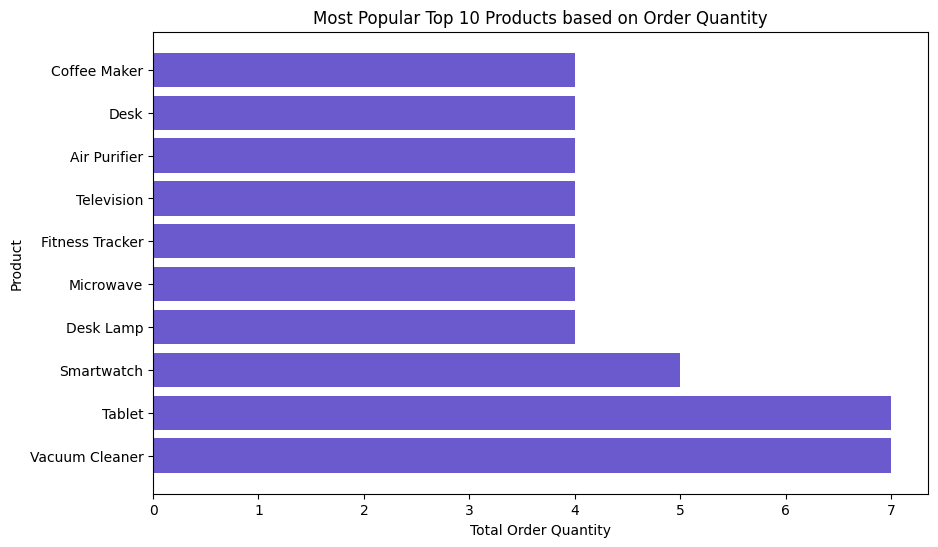

In [45]:
# Group by 'product_name' and calculate total order quantity for each product
product_quantity = prod_ord_df.groupby('product_name')['quantity'].sum().reset_index()

# Sort the products based on order quantity in descending order
product_quantity_sorted = product_quantity.sort_values(by='quantity', ascending=False)

# Select the top 10 products
top_products = product_quantity_sorted.head(10)
print(top_products)

# Visualize the results using a horizantal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_products['product_name'], top_products['quantity'], color='slateblue')
plt.xlabel('Total Order Quantity')
plt.ylabel('Product')
plt.title('Most Popular Top 10 Products based on Order Quantity')

plt.show()


<h2>Inference:</h2>
<ul>
    <li>Vaccum Cleaner and Tablet are the most popular products based on order quantity which is 7.</li>
</ul>

<h1>Sales Analysis</h1>

      product_name  total_price
33          Tablet     187000.0
34      Television     164000.0
17          Laptop     110000.0
31        Sofa Set      90000.0
6             Desk      74000.0
35  Vacuum Cleaner      72000.0
14  Gaming Console      70000.0
9     Dining Table      70000.0
29      Smartwatch      68000.0
0     Air Purifier      64000.0


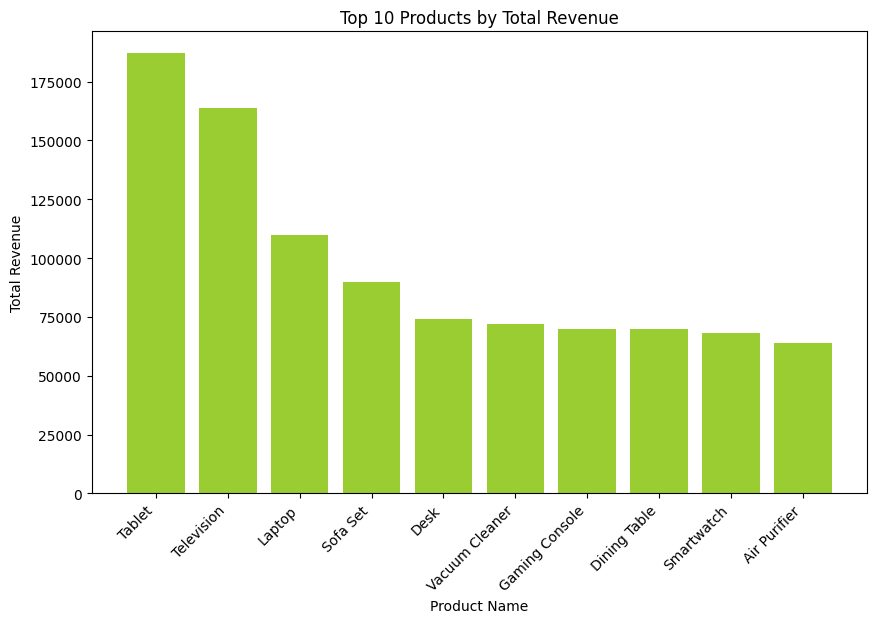

In [46]:
# Group by 'product_name' and calculate total revenue for each product
product_revenue = prod_ord_df.groupby('product_name')['total_price'].sum().reset_index()

# Sort the products based on total revenue in descending order
product_revenue_sorted = product_revenue.sort_values(by='total_price', ascending=False)

# Select the top 10 products
top_10_products = product_revenue_sorted.head(10)
print(top_10_products )

# Visualize the results using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_products['product_name'], top_10_products['total_price'], color='yellowgreen')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title('Top 10 Products by Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()


<h2>Inference:</h2>
<ul>
    <li>Tablet has the highest total revenue ranging above Rs 175000.</li>
    <li>Air Purifier has the least total revenue ranging Rs50000-Rs60000.</li>
</ul>

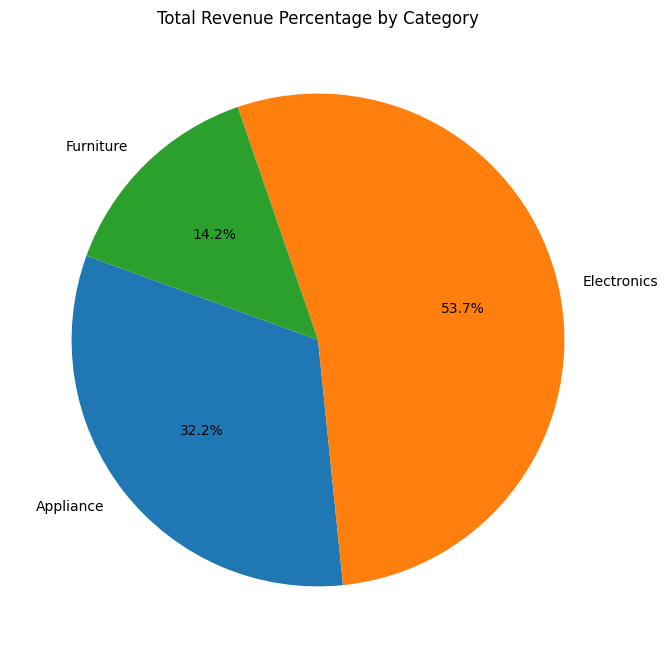

In [22]:
# Group by 'category' and calculate total revenue for each category
category_revenue = prod_ord_df.groupby('category')['total_price'].sum().reset_index()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_revenue['total_price'], labels=category_revenue['category'], autopct='%1.1f%%', startangle=160)
plt.title('Total Revenue Percentage by Category')
plt.show()


<h2>Inference:</h2>
<ul>
    <li>The category 'Electronics' has the highest total revenue with a percentage 52.3% .</li>
    <li>After that "Furniture' and 'Appliances' come with a percentage of 32.2% and 14.2% respectively.</li>
</ul>

Total Revenue 1586400.0


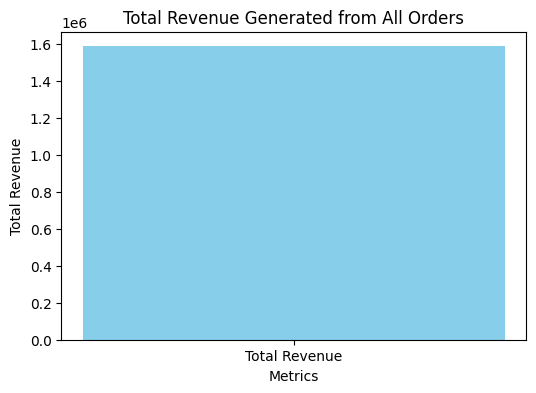

In [23]:
# Calculate total revenue
total_revenue = prod_ord_df['total_price'].sum()
print('Total Revenue',total_revenue)
# Visualize the results using a bar plot 
plt.figure(figsize=(6, 4))
plt.bar(['Total Revenue'], [total_revenue], color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Generated from All Orders')
plt.show()

<h2>Inference:</h2>
<ul>
    <li>The total revenue generated from all orders is between Rs 1.4 lakhs and Rs 1.6 lakhs. </li>
</ul>

        product_name  profit
1            Blender  -100.0
39             chair  -400.0
15      Gaming Mouse  -500.0
22  Portable Speaker  -500.0
27       Smart Scale  -500.0
3         Car Vacuum -1000.0
38    Wireless Mouse -1000.0
37  Wireless Earbuds -1000.0
21  Portable Charger -1000.0
32  Streaming Device -1000.0


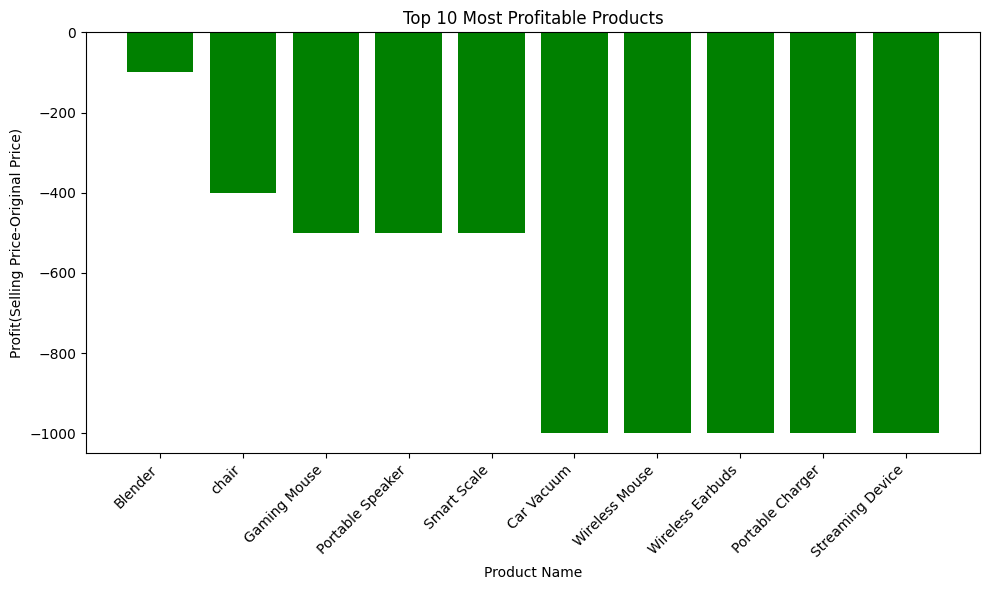

In [47]:
# Calculate profit for each product
prod_ord_df['profit'] = prod_ord_df['selling_price'] - prod_ord_df['original_price']

# Group by 'product_name' and calculate total profit for each product
product_profit = prod_ord_df.groupby('product_name')['profit'].sum().reset_index()

# Sort the products based on total profit in descending order
product_profit_sorted = product_profit.sort_values(by='profit', ascending=False)

# Select the top 10 products 
top_profitable_products = product_profit_sorted.head(10)
print(top_profitable_products )

# Visualize the results using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_profitable_products['product_name'], top_profitable_products['profit'], color='green')
plt.xlabel('Product Name')
plt.ylabel('Profit(Selling Price-Original Price)')
plt.title('Top 10 Most Profitable Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h2>Inference:</h2>
<ul>
    <li>Blender is the only product from which profit had been made.</li>
    <li>The products that faced loss are Car Vacuum, Wireless Mouse, Wireless Earbuds, Portable Charger and Streaming Device.</li>
</ul>

<h1>Customer Order Patterns</h1>

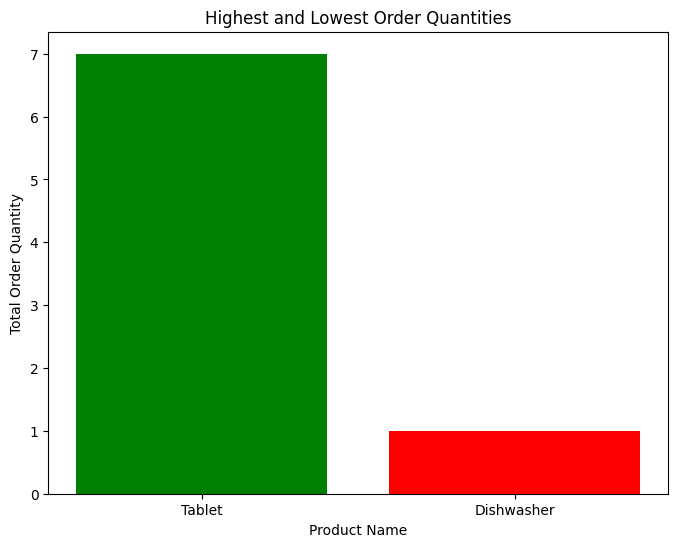

In [91]:
# Group by 'product_name' and calculate total order quantity for each product
product_quantity = prod_ord_df.groupby('product_name')['quantity'].sum().reset_index()

# Find product with the highest order quantity
max_quantity_product = product_quantity.loc[product_quantity['quantity'].idxmax()]

#Find product with the lowest order quantity
min_quantity_product = product_quantity.loc[product_quantity['quantity'].idxmin()]

# Visualize the results for the highest and lowest order quantities using a bar plot
plt.figure(figsize=(8, 6))
plt.bar([max_quantity_product['product_name'], min_quantity_product['product_name']],
        [max_quantity_product['quantity'], min_quantity_product['quantity']], color=['green', 'red'])
plt.xlabel('Product Name')
plt.ylabel('Total Order Quantity')
plt.title('Highest and Lowest Order Quantities')
plt.show()


<h2>Inference:</h2>
<ul>
    <li>Tablet has the most order quantities i.e. 7 order quantities. </li>
    <li>Dishwasher has the least number of order quantities i.e 1 order quantity.</li>
</ul>

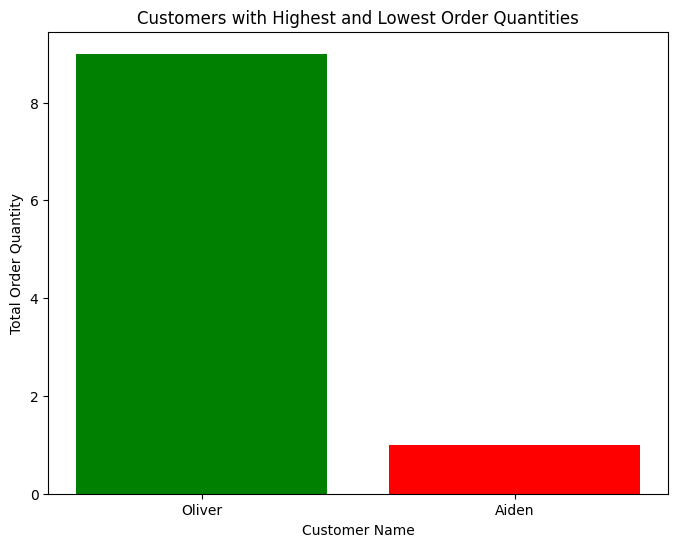

In [96]:
# Group by 'name' and calculate total order quantity for each customer
customer_quantity = cust_ord_df.groupby('name')['quantity'].sum().reset_index()

# Find customer with the highest order quantity
max_quantity_customer = customer_quantity.loc[customer_quantity['quantity'].idxmax()]

# Find customer with the lowest order quantity
min_quantity_customer = customer_quantity.loc[customer_quantity['quantity'].idxmin()]

# Visualize the results for the highest and lowest order quantities using a bar plot
plt.figure(figsize=(8, 6))
plt.bar([max_quantity_customer['name'], min_quantity_customer['name']],
        [max_quantity_customer['quantity'], min_quantity_customer['quantity']], color=['green', 'red'])
plt.xlabel('Customer Name')
plt.ylabel('Total Order Quantity')
plt.title('Customers with Highest and Lowest Order Quantities')
plt.show()


<h2>Inference:</h2>
<ul>
    <li>Oliver has the highest order quantity and Aiden has the lowest.</li>
</ul>

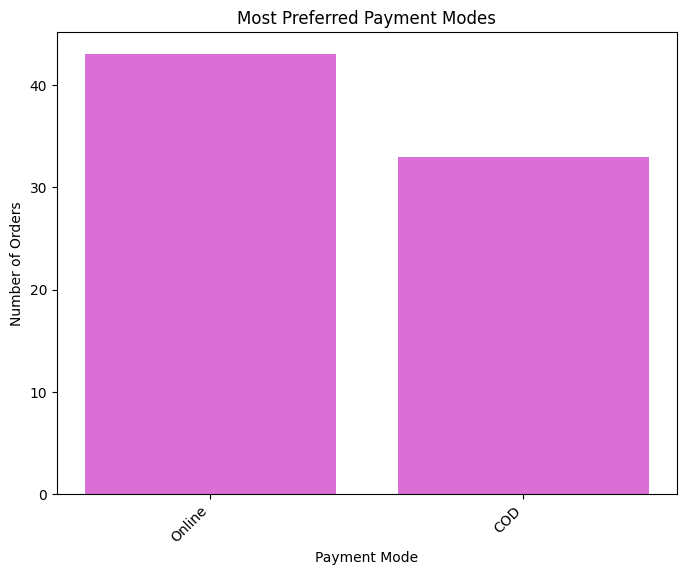

In [99]:
# Step 1: Group by 'payment_mode' and calculate the total count of orders for each mode
payment_mode_counts = order_df.groupby('payment_mode').size().reset_index(name='order_count')

# Step 2: Sort the payment modes based on the total count in descending order
sorted_payment_modes = payment_mode_counts.sort_values(by='order_count', ascending=False)

# Step 3: Visualize the results using a bar plot
plt.figure(figsize=(8, 6))
plt.bar(sorted_payment_modes['payment_mode'], sorted_payment_modes['order_count'], color='orchid')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.title('Most Preferred Payment Modes')
plt.xticks(rotation=45, ha='right')
plt.show()


<h2>Inference:</h2>
<ul>
    <li>The most preferred payment mode is online with a number of more than 40 orders.</li>
    <li>COD has the number of more than 30 orders.</li>
</ul>

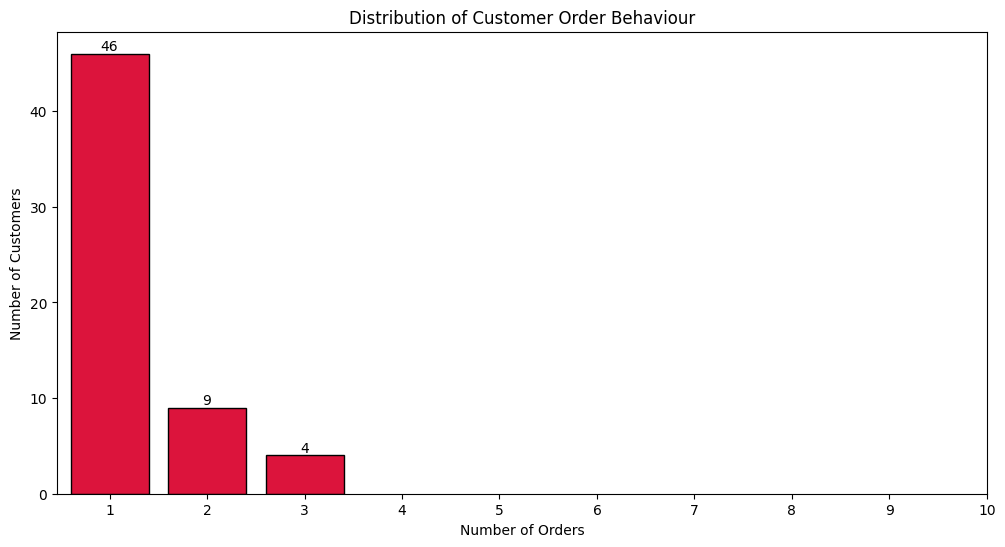

In [53]:
# Visualizing the distribution of customer order frequency.
# Merge cust_df and order_df to get information about customer orders
merged_df = pd.merge(cust_df, order_df, on='customer_id')

# Count the number of orders for each customer
order_counts = merged_df['customer_id'].value_counts()

# Set up the Matplotlib figure
plt.figure(figsize=(12, 6))

# Create a bar plot with a specified range
plt.bar(order_counts.value_counts().sort_index().index, 
        order_counts.value_counts().sort_index().values, 
        color='crimson', edgecolor='black') 

# Adding labels and title
plt.title('Distribution of Customer Order Behaviour')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')

# Display the values above the bars
for i, value in enumerate(order_counts.value_counts().sort_index()):
    plt.text(i + 1, value, str(value), ha='center', va='bottom')

# Customize x-axis ticks
plt.xticks(range(1, 11), [str(i) for i in range(1, 11)]) 

# Display the plot
plt.show()


<h2>Inference:</h2>
<ul>
    <li>46 customers have placed 1 order </li>
    <li>9 customers placed 2 orders.</li>
    <li>4 customers placed 3 orders.</li>
</ul>

<h2>Time-based Analysis:</h2>

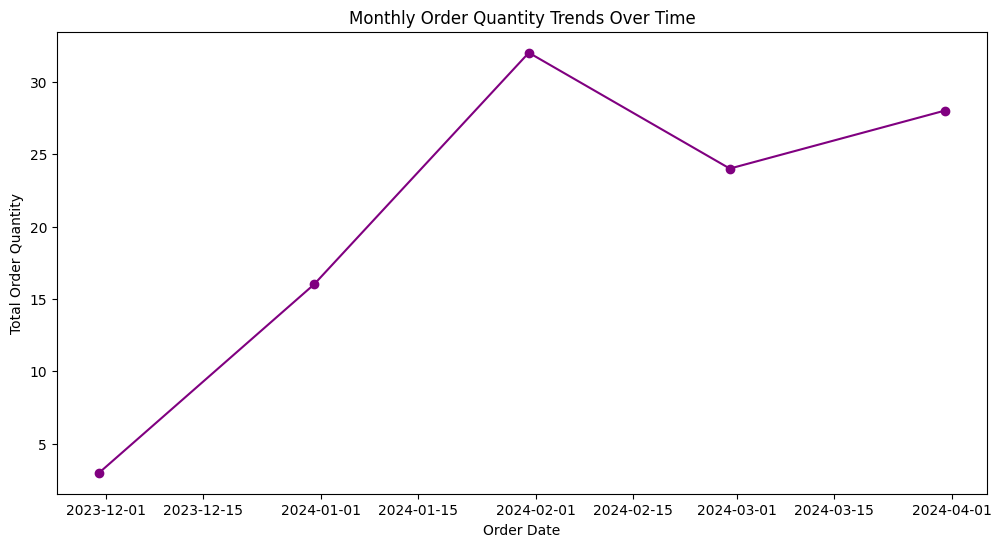

In [100]:
# Group by month and calculate the total order quantity for each month
monthly_order_quantity = order_df.resample('M', on='order_date')['quantity'].sum().reset_index()

# Set up the Matplotlib figure and axis
plt.figure(figsize=(12, 6))

# Plotting the line chart
plt.plot(monthly_order_quantity['order_date'], monthly_order_quantity['quantity'], marker='o', color='purple', linestyle='-')

# Adding labels and title
plt.title('Monthly Order Quantity Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Order Quantity')

# Display the plot
plt.show()


<h2>Inference:</h2>
<ul>
    <li>On 2024-02-01 most orders were placed.</li>
    <li>From 2021-01-01 there is a constant rise in the placing of orders.</li>
    <li>From 2024-02-01 there is a decline in the placing order trend till 2024-03-01.</li>
    <li>From 2024-03-01 there is again rise in the place of orders.</li>
</ul>

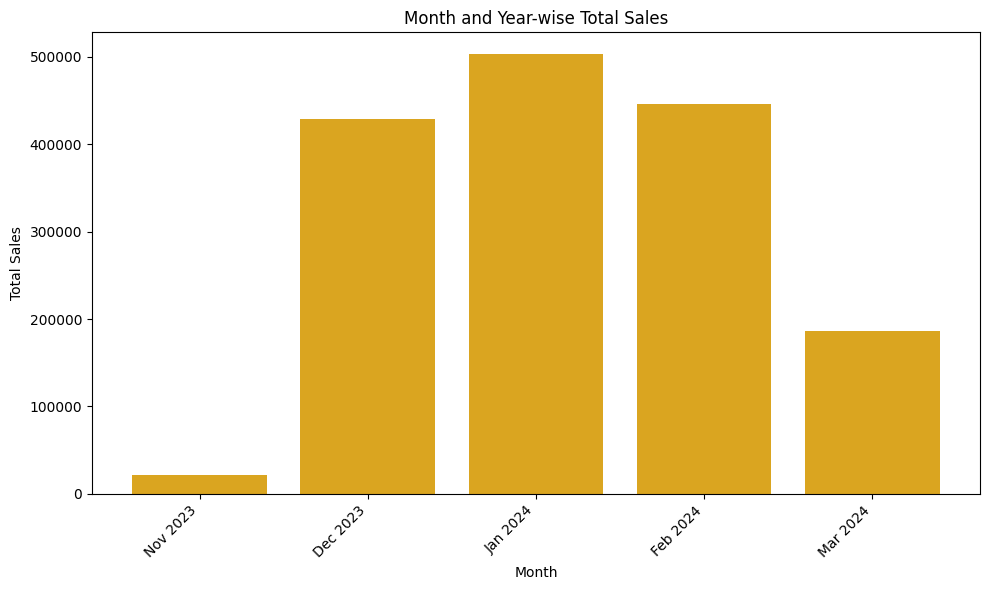

In [13]:
# Extract the month from the 'order_date' column
order_df['order_month'] = order_df['order_date'].dt.to_period('M')

# Group by 'order_month' and calculate total sales for each month
monthly_sales = order_df.groupby('order_month')['total_price'].sum().reset_index()

# Visualize the results using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['order_month'].dt.strftime('%b %Y'), monthly_sales['total_price'], color='goldenrod')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Month and Year-wise Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h2>Inference:</h2>
<ul>
    <li>In January 2024 the highest sales has been made with a range of Rs 500000.</li>
</ul>

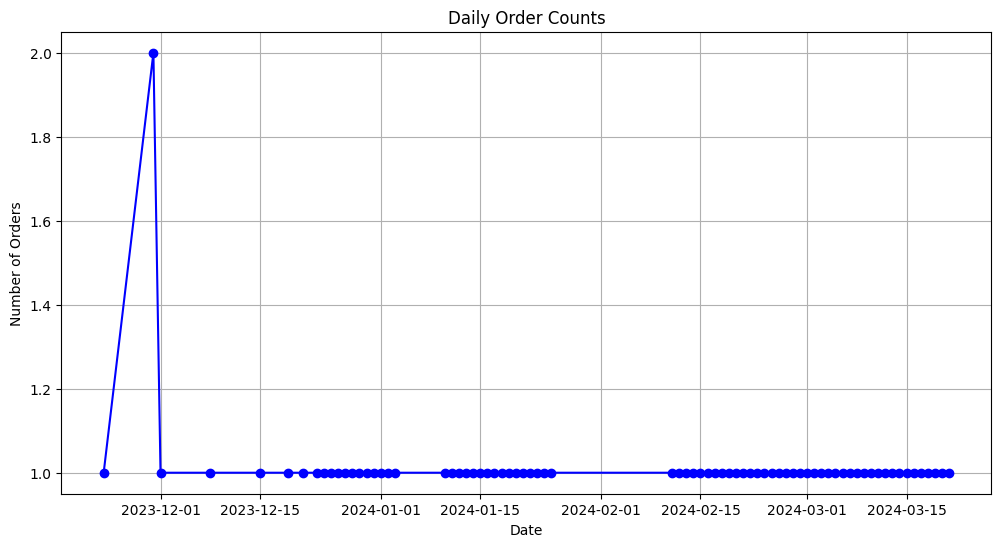

In [15]:
# Extracting date and count of orders for each date
order_counts = order_df['order_date'].dt.date.value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(order_counts.index, order_counts.values, marker='o', linestyle='-', color='b')
plt.title('Daily Order Counts')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


<h2>Inference:</h2>
<ul>
    <li>From the plot we can see that on 2023-12-01 most orders were placed. </li>
</ul>

<h1>Product Performance</h1>

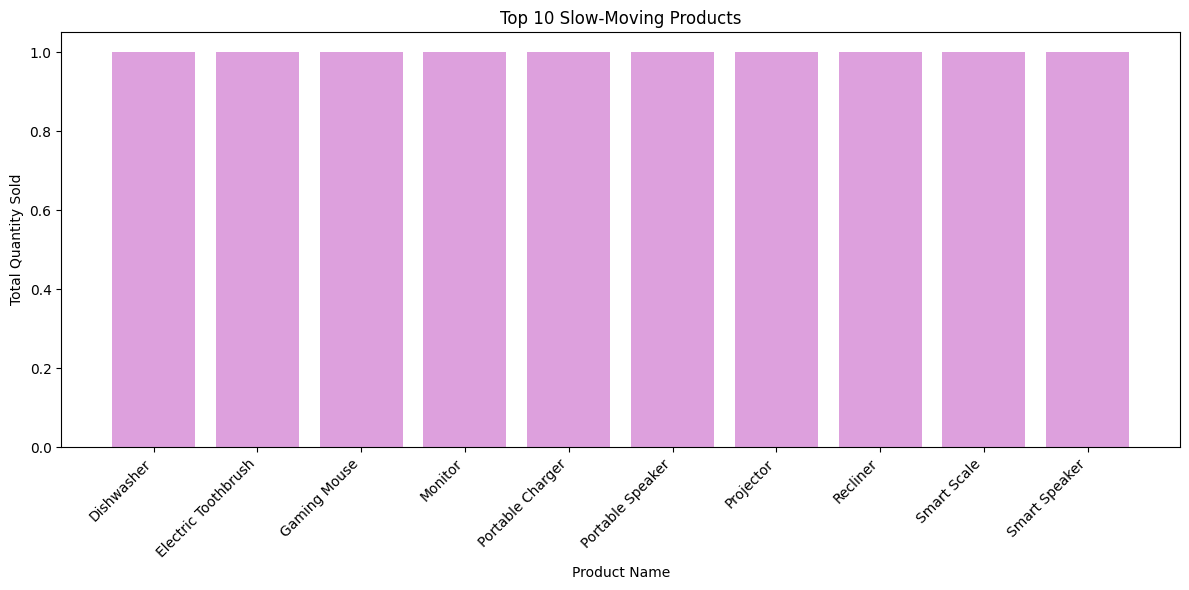

Inference on Slow-Moving Products:
           product_name  quantity
10           Dishwasher       1.0
11  Electric Toothbrush       1.0
15         Gaming Mouse       1.0
20              Monitor       1.0
21     Portable Charger       1.0
22     Portable Speaker       1.0
24            Projector       1.0
25             Recliner       1.0
27          Smart Scale       1.0
28        Smart Speaker       1.0


In [52]:
#Group by 'product_name' and calculate total quantity sold for each product
product_quantity = prod_ord_df.groupby('product_name')['quantity'].sum().reset_index()

# Identify the slow-moving products 
slow_moving_products = product_quantity.nsmallest(10, 'quantity')

# Visualize the results using a bar plot
plt.figure(figsize=(12,6))
plt.bar(slow_moving_products['product_name'], slow_moving_products['quantity'], color='plum')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Slow-Moving Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the slow-moving products
print('Inference on Slow-Moving Products:')
print(slow_moving_products[['product_name', 'quantity']])


<h1>Geographical Analysis</h1>

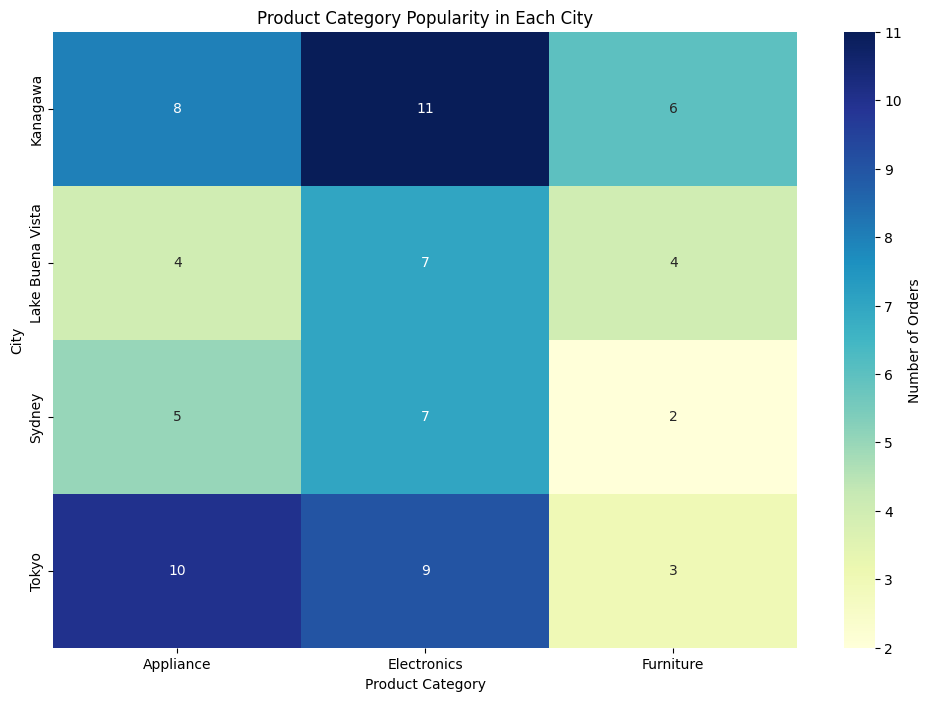

In [36]:
# Merge order_df, cust_df, and product_df to create a comprehensive DataFrame
merged_df = pd.merge(order_df, cust_df, on='customer_id')
merged_df = pd.merge(merged_df, product_df, on='product_id')

# Create a pivot table to count the number of orders for each product category in each city
pivot_table = pd.pivot_table(merged_df, values='order_id', index='city', columns='category', aggfunc='count', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Orders'})
plt.title('Product Category Popularity in Each City')
plt.xlabel('Product Category')
plt.ylabel('City')
plt.show()


<h2>Inference:</h2>
<ul>
    <li>Electronics has the highest number of order in the city Kanagawa.</li>
    <li>Appliance category has 10 orders in Tokyo.</li>
    <li>Least orders are for the category 'Furniture' in Tokyo and Sydney.</li>
</ul>

<h1>Conclusion:</h1>

#### Customer Analysis:
- **City-wise Customer Distribution:**
  - Tokyo stands out with the highest customer count, exceeding 20, followed by Kanagawa with 15-20 customers, and Lake Buena Vista with 0-10 customers.

- **Most Frequent Customers:**
  - Customer IDs 'C1013', 'C1005', 'C1009', 'C1010' exhibit the highest order frequency, while IDs 'C1003', 'C1019', 'C1017', 'C1016', 'C1014', 'C1015' show lower frequency ranging from 0.0-2.0.

- **Pincode Analysis:**
  - Pincode 171 hosts the maximum number of customers, while the range 98766 to 98765 has the least.

#### Product Analysis:
- **Product Categories and Sub-Categories:**
  - 'Electronics' dominates both in categories and sub-categories, having the maximum number of products.

- **Low Stock Levels:**
  - Products like 'Refrigerator', 'Dishwasher', 'External Hard Drive' have stock levels below 20.

- **Price Analysis:**
  - Most selling products, 'Vaccum Cleaner' and 'Tablet,' have quantities of 4.0, and the average selling price lies between Rs10000 and Rs20000.

#### Order and Sales Analysis:
- **Top Orders and Delivery Status:**
  - Most orders are delivered, followed by shipped orders, while returned orders are the least.

- **Customer Spending and Profit/Loss:**
  - Customers 'C1005', 'C1009', 'C1010', 'C1013' have made the most orders.
  - 'Tablet' has the highest total revenue, while 'Blender' is the only product with profit.

- **Payment Mode Preferences:**
  - Online payments are the most preferred, with COD being another popular choice.

#### Time-based and Geographical Analysis:
- **Time-based Trends:**
  - Orders peaked on 2024-02-01, and a consistent rise in order placement is observed from 2021-01-01, with fluctuations in the subsequent months.

- **Monthly Sales:**
  - The highest sales occurred in January 2024, with revenues around Rs 5000.

- **Geographical Patterns:**
  - Kanagawa has the highest number of orders in the 'Electronics' category, while Tokyo sees 10 orders in the 'Appliance' category. 'Furniture' has the least orders in Tokyo, Sydney, and Lake Buena Vista.

### Overall:
The analysis reveals significant insights into customer behavior, product popularity, and order dynamics. Tokyo emerges as a major market, with 'Electronics' dominating sales. Understanding customer preferences, stock levels, and payment choices can guide strategic decisions for inventory management, marketing, and customer retention. The observed trends over time and across regions provide valuable insights for future planning and optimization.